In [1]:
from langgraph.graph import StateGraph
from typing import TypedDict

In [2]:
class AgentState(TypedDict):
    values: list[int]
    name: str
    result: str

In [3]:
def process_values(state: AgentState) -> AgentState:
    """This function process the values for user"""

    state['result'] = f"Hey there {state['name']} your values sum is: {sum(state['values'])}"
    return state

In [4]:
graph = StateGraph(AgentState)

graph.add_node("sum_values", process_values)


graph.set_entry_point("sum_values")
graph.set_finish_point("sum_values")

app = graph.compile()

In [6]:
result = app.invoke({"name": "beast", "values": list(range(11))})

In [7]:
result

{'values': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'name': 'beast',
 'result': 'Hey there beast your values sum is: 55'}

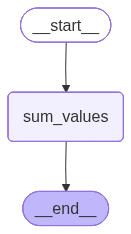

In [8]:
from IPython.display import Image, display
display(Image(app.get_graph(). draw_mermaid_png()))